In [2]:
#!pip install tensorflow

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## **Load Dataset**

In [4]:
data = tf.keras.datasets.mnist

In [5]:
(x_train, y_train), (x_test, y_test) = data.load_data()

In [6]:
print('X_train shape =', x_train.shape)
print('y_train shape =', y_train.shape) #label

X_train shape = (60000, 28, 28)
y_train shape = (60000,)


In [7]:
print('X_test shape =', x_test.shape)
print('y_test shape =', y_test.shape) #label

X_test shape = (10000, 28, 28)
y_test shape = (10000,)


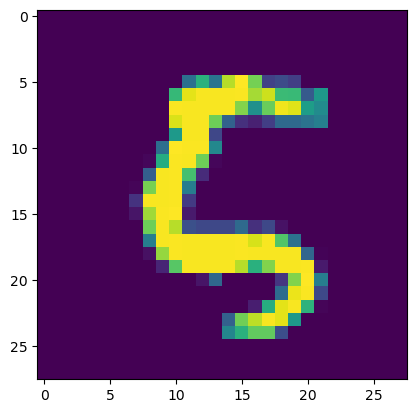

In [8]:
#visualize image from train data
plt.imshow(x_train[2000])

In [9]:
y_train[2000]

5

RGB Image:
    1- Red ---> (255, 0, 0)
    2- Green ---> (0, 255, 0)
    3- Blue ---> (0, 0, 255)

In [11]:
#scaling images ---> divide image by 255 ---> 0:1
x_train = x_train / 255 
x_test = x_test / 255

In [12]:
x_train[2000]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## **Model Building**

In [14]:
from tensorflow.keras import Sequential

In [15]:
model = Sequential() #model layers are connected

In [16]:
#input layer ----> Hidden Layers ----> Output layer
model.add(tf.keras.layers.Flatten(input_shape = (28,28))) #input layer ---> to take input images

#hidden layers ---> Dense Layer 
model.add(tf.keras.layers.Dense(128, activation = tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.keras.activations.relu))

#Output Layer ---> Dense Layer ---> softmax activation (multi-class classification) 10 classes
model.add(tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax))

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1- model building
2- compile model
3- fit model

In [18]:
#model compile
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [36]:
#fit model
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 935us/step - accuracy: 0.9901 - loss: 0.0303
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 949us/step - accuracy: 0.9926 - loss: 0.0237
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 914us/step - accuracy: 0.9927 - loss: 0.0227
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 908us/step - accuracy: 0.9935 - loss: 0.0184
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 984us/step - accuracy: 0.9947 - loss: 0.0156
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 953us/step - accuracy: 0.9947 - loss: 0.0170
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 945us/step - accuracy: 0.9952 - loss: 0.0152
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 954us/step - accuracy: 0.9954 - loss: 0.0145
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 919us/step - accuracy: 0.9971 - loss: 0.0088
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 947us/step - accuracy: 0.9968 - loss: 0.0096


In [37]:
#test error, test accuracy
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 0.9741 - loss: 0.1228


In [40]:
model.save('minst_model.h5')